In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [2]:
nadia = cv2.imread('Nadia_Murad.jpg',0)
denis = cv2.imread('Denis_Mukwege.jpg',0)
solvay = cv2.imread('solvay_conference.jpg',0)

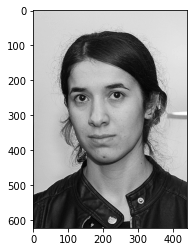

In [5]:
plt.imshow(nadia,cmap='gray')

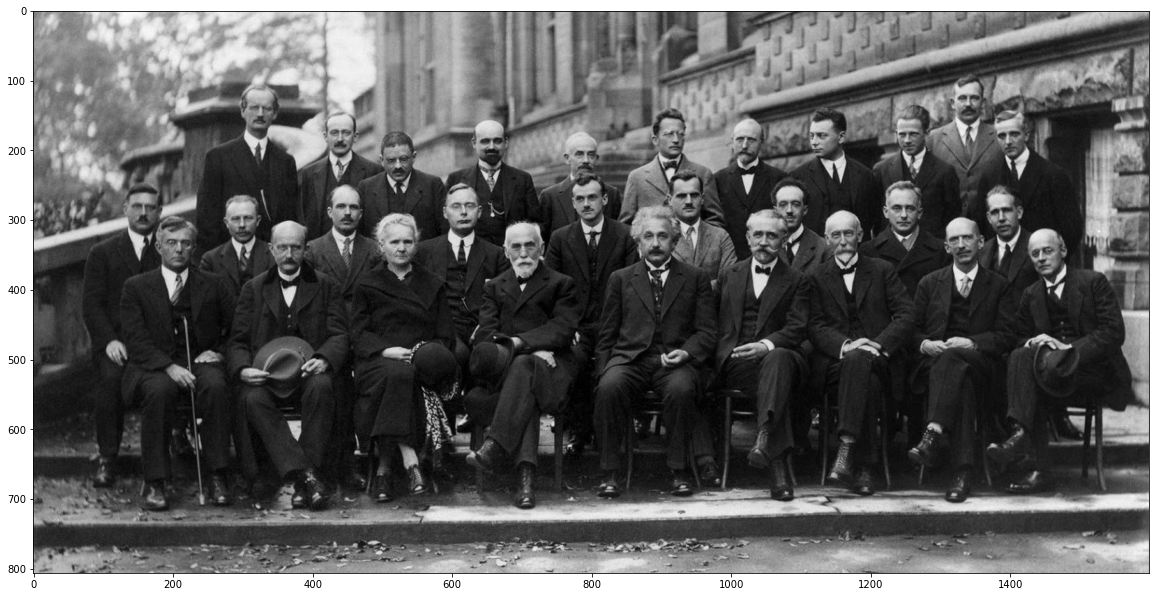

In [6]:
display(solvay)

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [8]:
def detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

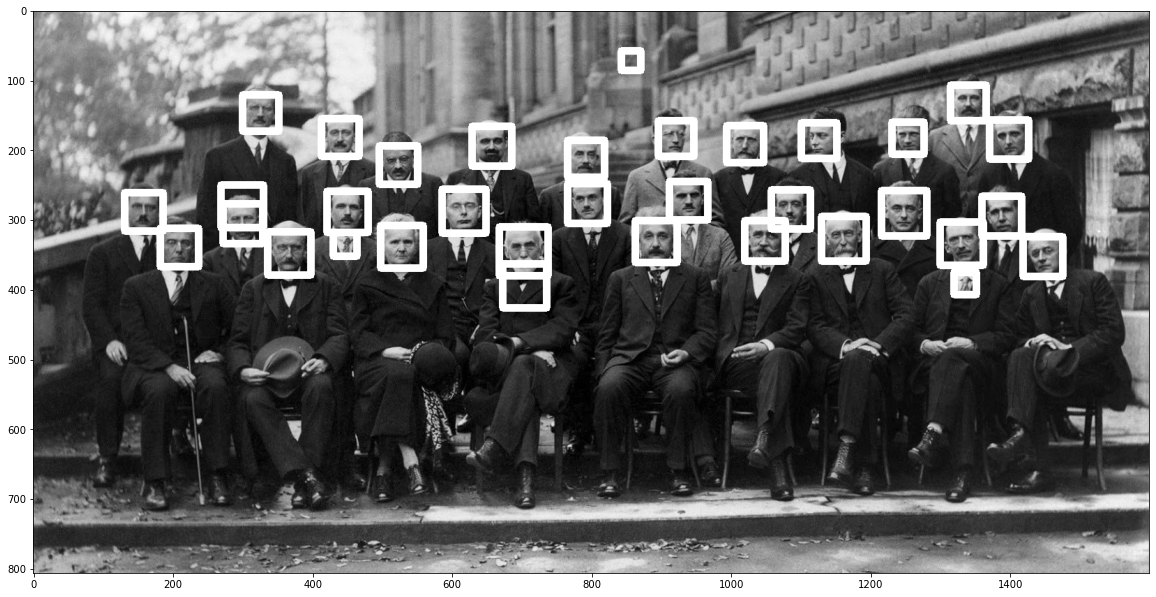

In [9]:
result = detect_face(solvay)
display(result)

In [10]:
def adj_detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

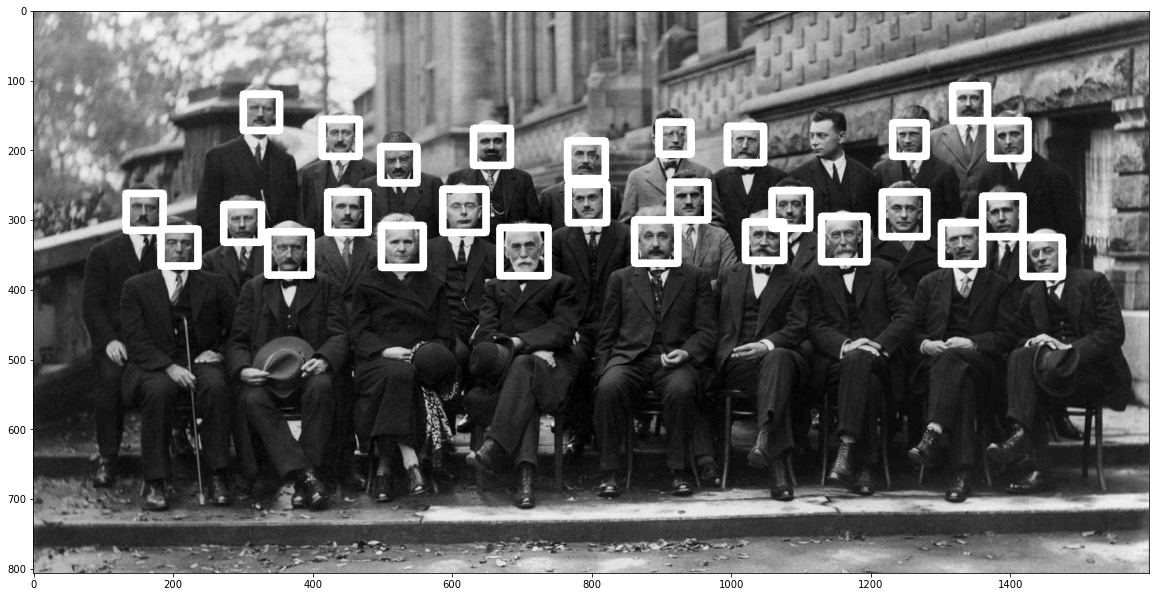

In [11]:
result = adj_detect_face(solvay)
display(result)

In [12]:
eyes_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [13]:
def detect_eyes(img):
    face_img = img.copy()
    
    eyes_rects = eyes_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

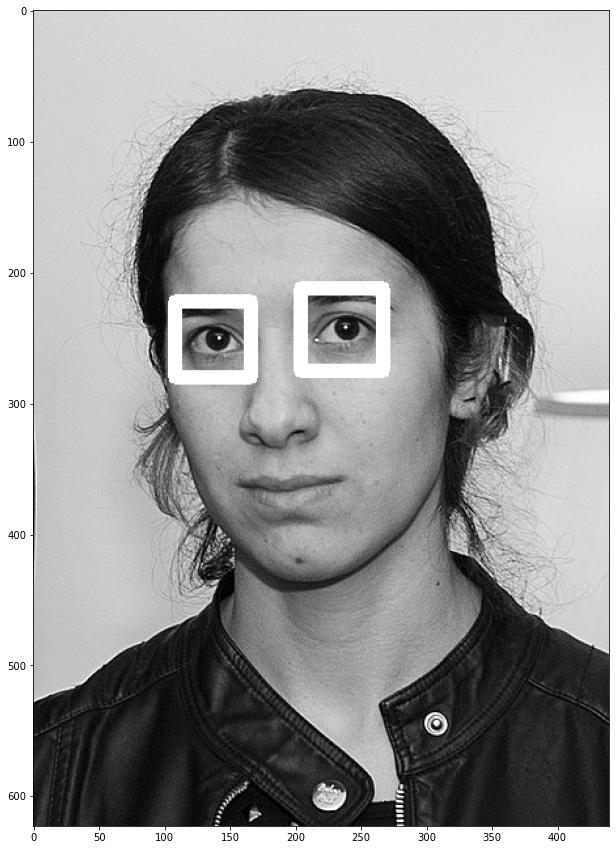

In [14]:
result = detect_eyes(nadia)
display(result)

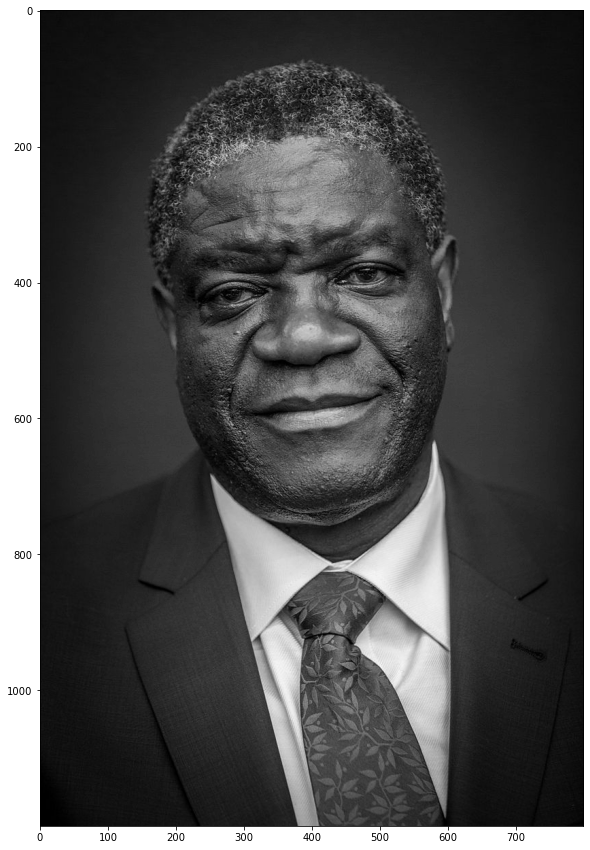

In [15]:
result = detect_eyes(denis)
display(result)

In [16]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow('Video Face Detect',frame)
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

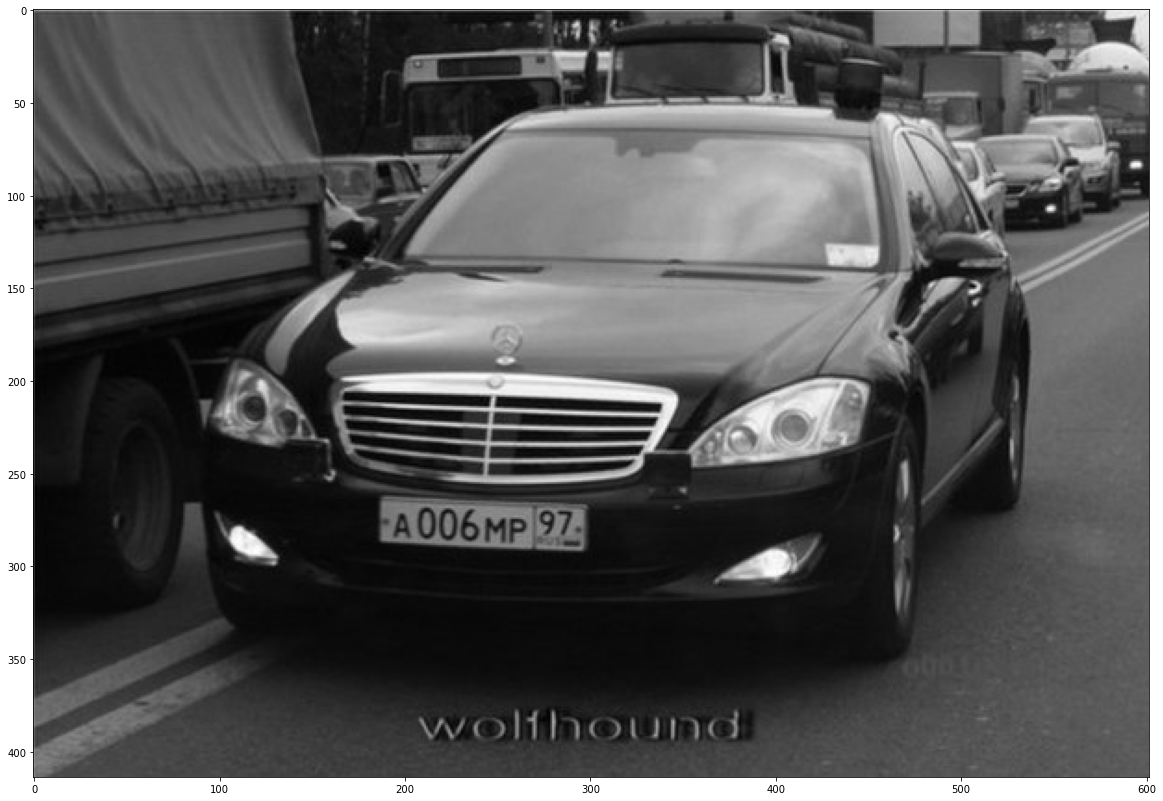

In [17]:
img = cv2.imread('car_plate.jpg',0)
display(img)

In [18]:
car_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [21]:
def detect_plate(img):
    img_copy = img.copy()
    
    # Corrected function call
    plates = car_cascade.detectMultiScale(img_copy, scaleFactor=1.2, minNeighbors=5)
    
    for (x, y, w, h) in plates:
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 255, 255), 10)
        
    return img_copy

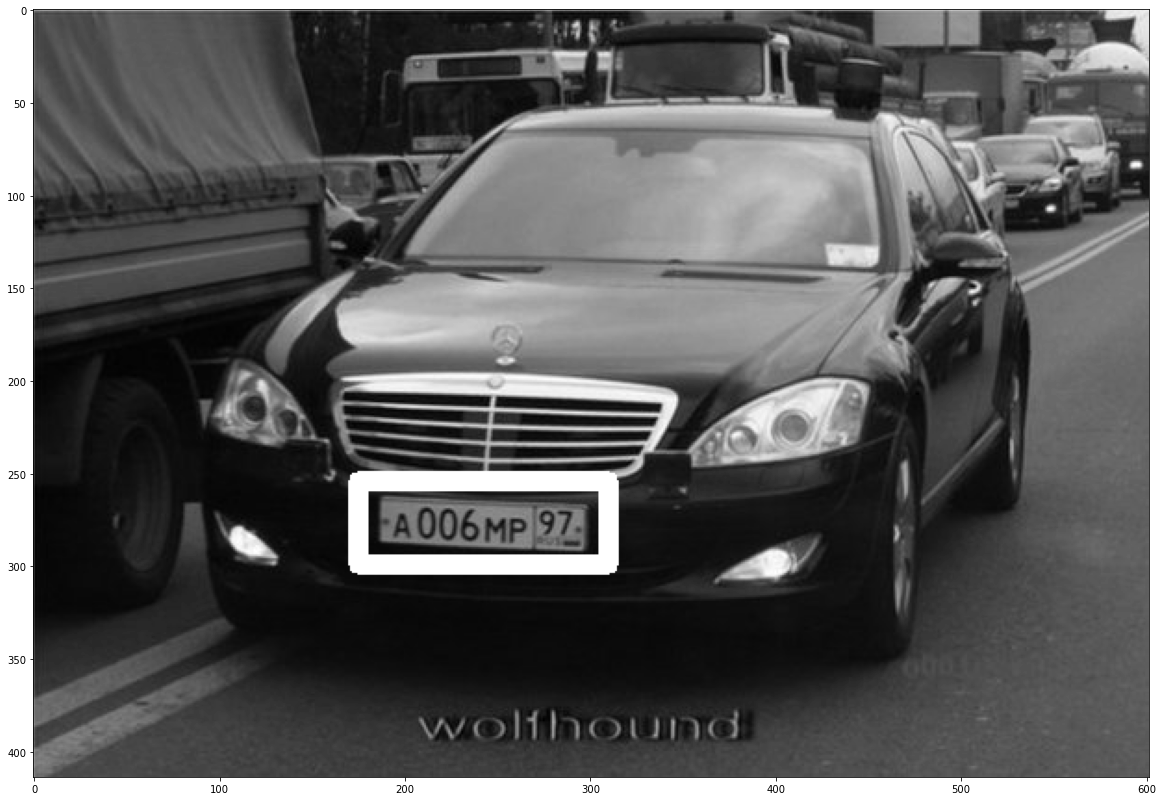

In [22]:
result = detect_plate(img)
display(result)

# Object Tracking

### Tracking APIs (Built-in with openCV)

In [23]:
def ask_for_tracker():
    print('Welcome! What Tracker API would you like to use?')
    print('Enter 0 for Boosting: ')
    print('Enter 1 for MIL: ')
    print('Enter 2 for KCF: ')
    print('Enter 3 for TLD: ')
    print('Enter 4 for MedianFlow: ')
    choice = input("Please select your tracker: ")
    
    if choice == '0':
        tracker = cv2.legacy.TrackerBoosting_create()
    elif choice == '1':
        tracker = cv2.legacy.TrackerMIL_create()
    elif choice == '2':
        tracker = cv2.TrackerKCF_create()
    elif choice == '3':
        tracker = cv2.legacy.TrackerTLD_create()
    elif choice == '4':
        tracker = cv2.legacy.TrackerMedianFlow_create()
        
    return tracker

In [25]:
tracker = ask_for_tracker()
tracker_name = str(tracker).split()[0][1:]

#read video
cap = cv2.VideoCapture(0)

#read first frame
ret,frame = cap.read()

#special function allows us to draw on the very first frame our desired ROI
roi = cv2.selectROI(frame,False)

# Initialize tracker with first frame and bounding box
ret = tracker.init(frame,roi)

while True:
    #read a new frame
    ret,frame =  cap.read()
    
    #update tracker
    success,roi = tracker.update(frame)
    
    #roi variable is a tuple of 4 floats
    #we need each value and we them as integers
    (x,y,w,h) = tuple(map(int,roi))
    
    #Draw rectangle as tracker moves
    if success:
        # tracking success
        p1= (x,y)
        p2 = (x+w,y+h)
        cv2.rectangle(frame,p1,p2,(0,255,0),3)
    else:
        #tracking failure
        cv2.putText(frame,'Failure to Detect tracking!!',
                   (100,200),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)
    
    #display tracker type on frame
    cv2.putText(frame,tracker_name,
                   (20,400),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)
    
    #display result
    cv2.imshow(tracker_name,frame)
    
    k = cv2.waitKey(1) & 0xFF
    
    if k == 27:
        break
            
cv2.destroyAllWindows()
cap.release()

Welcome! What Tracker API would you like to use?
Enter 0 for Boosting: 
Enter 1 for MIL: 
Enter 2 for KCF: 
Enter 3 for TLD: 
Enter 4 for MedianFlow: 
Please select your tracker: 1
